![Verne](https://www.vernegroup.com/wp-content/uploads/2021/08/Image-1-1-1.png)

# Visualización con Pandas

In [1]:
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
conn = sqlite3.connect('/content/drive/MyDrive/Datos/Tiendas24H.sqlite')
query = "SELECT * FROM Clientes"

df = pd.read_sql_query(query,conn)

df.head()

,index,CodCliente,Nombre,Apellidos,FechaNacimiento,EstadoCivil,Sexo,Email,IngresosAnuales,HijosACargo,NivelAcademico,Ocupacion
0,0,000020,Jon,Yang,1976-04-08,M,M,jon24@outlook.com,90000.0,0.0,4,5
1,1,000026,Eugene,Huang,1975-05-14,S,M,eugene10@outlook.com,60000.0,3.0,4,5
2,2,000029,Ruben,Torres,1975-08-12,M,M,ruben35@outlook.com,60000.0,3.0,4,5
3,3,000046,Christy,Zhu,1978-02-15,S,F,christy12@outlook.com,70000.0,0.0,4,5
4,4,000047,Elizabeth,Johnson,1978-08-08,S,F,elizabeth5@outlook.com,80000.0,5.0,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            2441 non-null   int64  
 1   CodCliente       2441 non-null   object 
 2   Nombre           2441 non-null   object 
 3   Apellidos        2441 non-null   object 
 4   FechaNacimiento  2441 non-null   object 
 5   EstadoCivil      2440 non-null   object 
 6   Sexo             2440 non-null   object 
 7   Email            2440 non-null   object 
 8   IngresosAnuales  2440 non-null   float64
 9   HijosACargo      2440 non-null   float64
 10  NivelAcademico   2441 non-null   int64  
 11  Ocupacion        2441 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 229.0+ KB


In [5]:
df.describe()

,index,IngresosAnuales,HijosACargo,NivelAcademico,Ocupacion
count,2441.000000,2440.000000,2440.000000,2441.000000,2441.000000
mean,1220.000000,60475.409836,1.027049,3.382630,4.198279
std,704.800326,33549.413567,1.526077,1.738266,1.504642
min,0.000000,10000.000000,0.000000,1.000000,1.000000
25%,610.000000,40000.000000,0.000000,2.000000,3.000000
50%,1220.000000,60000.000000,0.000000,4.000000,4.000000
75%,1830.000000,80000.000000,2.000000,4.000000,5.000000
max,2440.000000,170000.000000,5.000000,6.000000,6.000000


In [6]:
df["IngresosAnuales"].mean()

60475.40983606558

In [7]:
print(df.corr())

                    index  IngresosAnuales  ...  NivelAcademico  Ocupacion
index            1.000000         0.077033  ...        0.006476   0.073188
IngresosAnuales  0.077033         1.000000  ...        0.165649   0.761700
HijosACargo      0.044170         0.480152  ...       -0.086732   0.244298
NivelAcademico   0.006476         0.165649  ...        1.000000   0.268549
Ocupacion        0.073188         0.761700  ...        0.268549   1.000000

[5 rows x 5 columns]


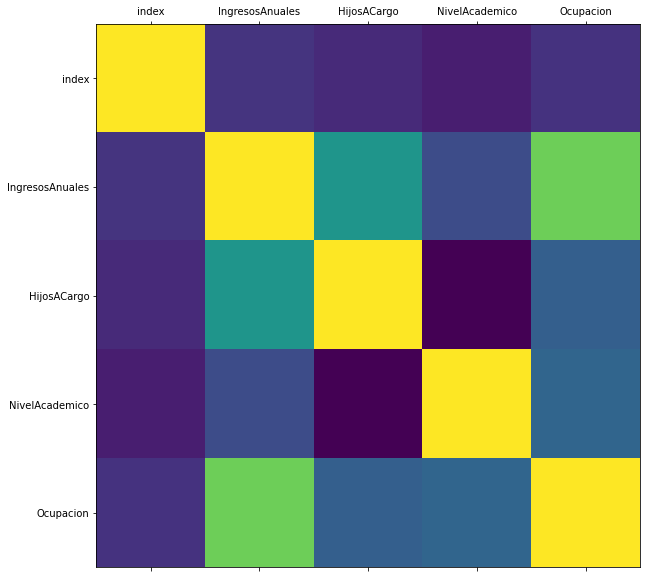

In [8]:
    correlacion = df.corr() 
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ax.matshow(correlacion) 
    plt.xticks(range(len(correlacion.columns)), correlacion.columns); 
    plt.yticks(range(len(correlacion.columns)), correlacion.columns); 

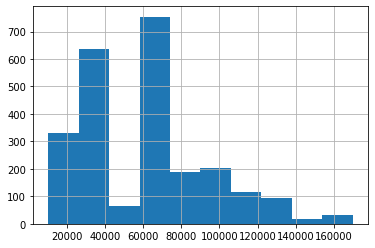

In [9]:
df.IngresosAnuales.hist()

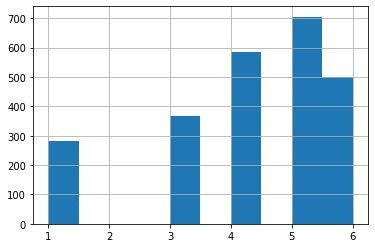

In [10]:
df.Ocupacion.hist()

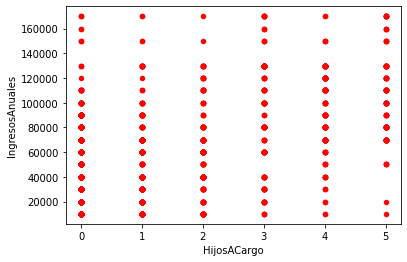

In [ ]:
# plot HijosACargo e Ingresos anuales
df.plot(kind='scatter',x='HijosACargo',y='IngresosAnuales',color='red')

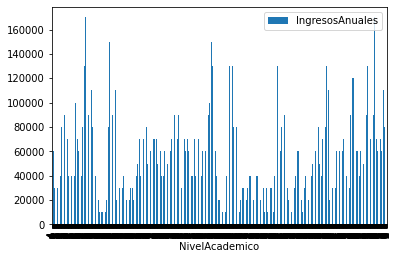

In [ ]:
df.plot(kind='bar',x='NivelAcademico',y='IngresosAnuales')

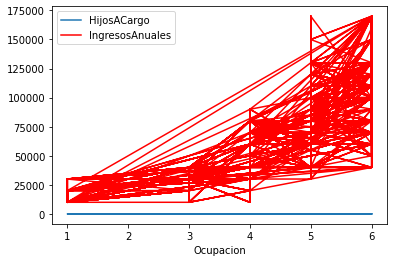

In [ ]:
plt.clf()
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='Ocupacion',y='HijosACargo',ax=ax)
df.plot(kind='line',x='Ocupacion',y='IngresosAnuales', color='red', ax=ax)

plt.show()

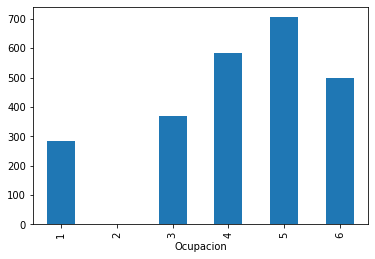

In [ ]:
df.groupby('Ocupacion').size().plot(kind='bar')

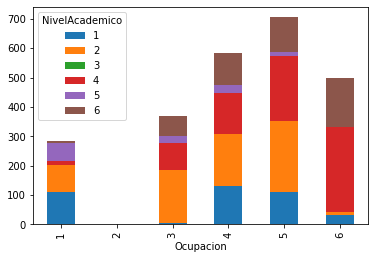

In [ ]:
df.groupby(['Ocupacion','NivelAcademico']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

<Figure size 432x288 with 0 Axes>

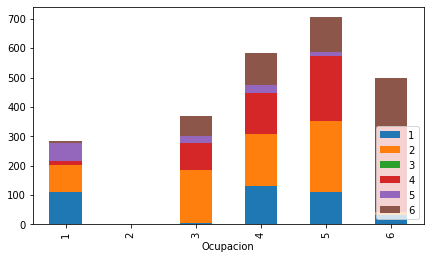

In [ ]:
plt.clf()
df.groupby(['Ocupacion','NivelAcademico'])['IngresosAnuales'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc='lower right')
plt.gcf().set_size_inches(7,4)
plt.show()

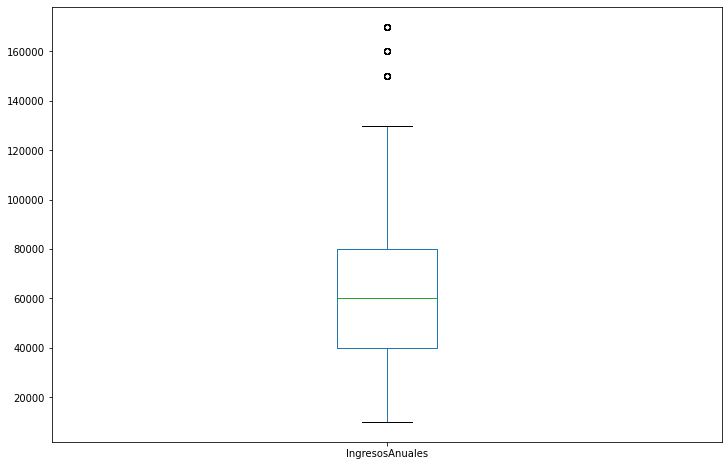

In [ ]:
df['IngresosAnuales'].plot(kind='box',figsize=(12,8))

In [12]:
df['FechaNacimiento'] = pd.to_datetime(df['FechaNacimiento'],infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            2441 non-null   int64         
 1   CodCliente       2441 non-null   object        
 2   Nombre           2441 non-null   object        
 3   Apellidos        2441 non-null   object        
 4   FechaNacimiento  2441 non-null   datetime64[ns]
 5   EstadoCivil      2440 non-null   object        
 6   Sexo             2440 non-null   object        
 7   Email            2440 non-null   object        
 8   IngresosAnuales  2440 non-null   float64       
 9   HijosACargo      2440 non-null   float64       
 10  NivelAcademico   2441 non-null   int64         
 11  Ocupacion        2441 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 229.0+ KB


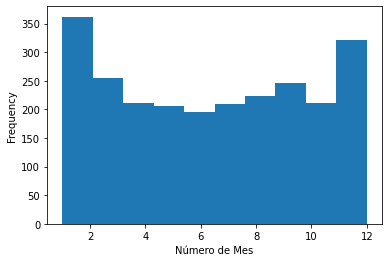

In [ ]:
plt.clf()
df['FechaNacimiento'].map(lambda d: d.month).plot(kind='hist')
plt.xlabel('Número de Mes')
#plotting.add_grid()
plt.show()

# Visualización con Seaborn

In [13]:
import seaborn as sns


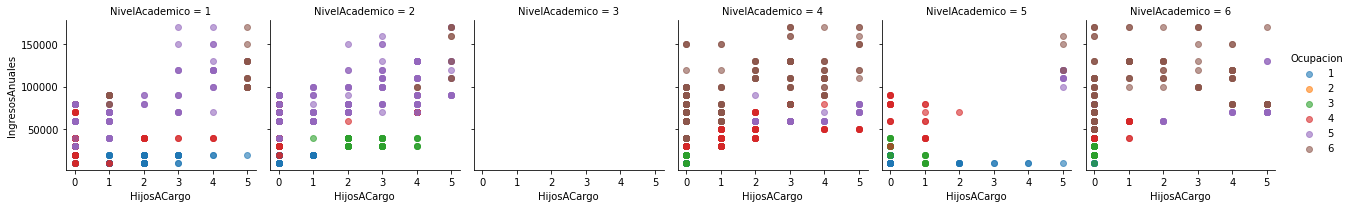

In [ ]:

g = sns.FacetGrid(df, col="NivelAcademico", hue="Ocupacion")
g.map(plt.scatter, "HijosACargo", "IngresosAnuales", alpha=.6)
g.add_legend()
plt.show()

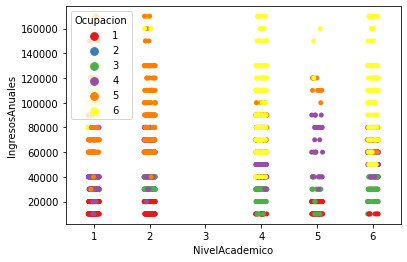

In [ ]:
sns.stripplot(x="NivelAcademico", y="IngresosAnuales", hue= "Ocupacion", data=df, palette="Set1")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; y

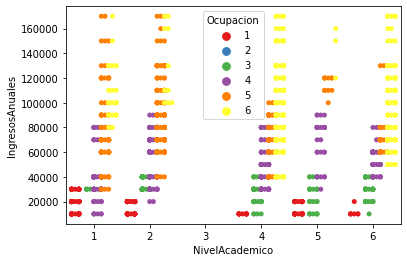

In [ ]:
sns.swarmplot(x="NivelAcademico", y="IngresosAnuales", hue="Ocupacion",data=df, palette="Set1", dodge=True)
plt.show()

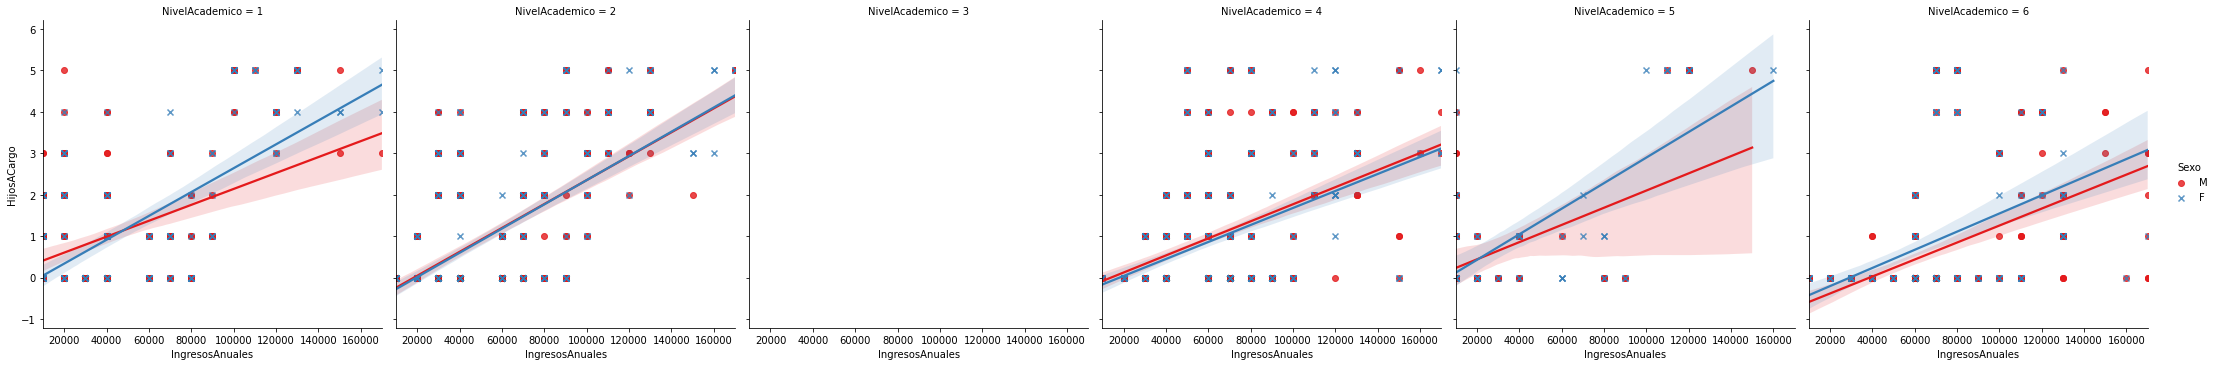

In [ ]:
sns.lmplot(x="IngresosAnuales", y="HijosACargo", hue="Sexo", col="NivelAcademico", markers=["o", "x"],palette="Set1",data=df)
plt.show()

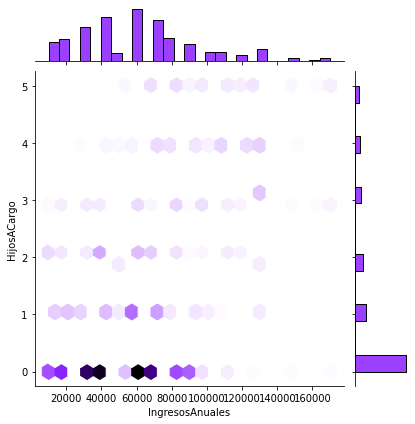

In [ ]:
sns.set_palette("gist_rainbow_r")
sns.jointplot(x="IngresosAnuales", y="HijosACargo", kind="hex",data=df )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


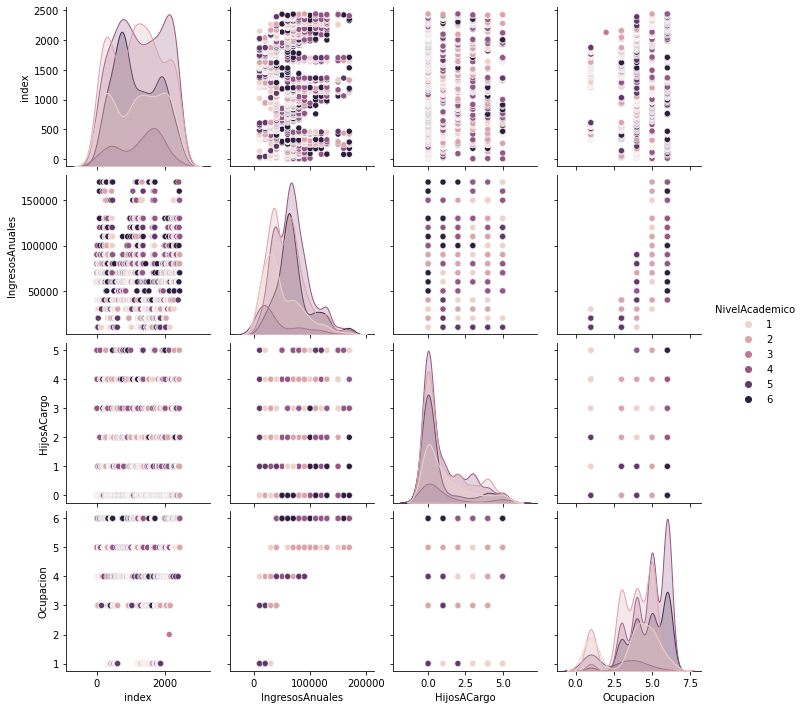

In [ ]:
sns.pairplot(df, hue="NivelAcademico") 
plt.show()